## KNNImputer: A robust way to impute missing values (using Scikit-Learn)

In [1]:
# https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

### Introduction
KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.

In this article, we introduce a guide to impute missing values in a dataset using values of observations for neighboring data points. For this, we use the very popular KNNImputer by scikit-learn k-Nearest Neighbors Algorithm.

### The Problem of Degrees of Freedom

Generally, if the proportion of missing observations in data is small relative to the total number of observations, we can simply remove those observations. However, this is not the most often case. Deleting the rows containing missing values may lead to parting away with useful information or patterns.

In statistical terms, this leads to reduced degrees of freedom as the number of independent pieces of information goes down.

### Missing Value Patterns

Types of missing values can generally be classified as:
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing Not at Random (MNAR)

### A shared sense of identity (Essence of kNN algorithm)

Univariate methods used for missing value imputation are simplistic ways of estimating the value and may not provide an accurate picture always. For example, let us say we have variables related to the density of cars on road and levels of pollutants in the air and there are few observations that are missing for the level of pollutants, imputing the level of pollutants by mean/median level of pollutants may not necessarily be an appropriate strategy.

In such scenarios, algorithms like k-Nearest Neighbors (kNN) can help to impute the values of missing data. Sociologists and community researchers suggest that human beings live in a community because neighbors generate a feeling of security and safety, attachment to community, and relationships that bring out a community identity through participation in various activities.

A similar imputation methodology that works on data is k-Nearest Neighbours (kNN) that identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.

Neighboring points for a dataset are identified by certain distance metrics, generally euclidean distance.

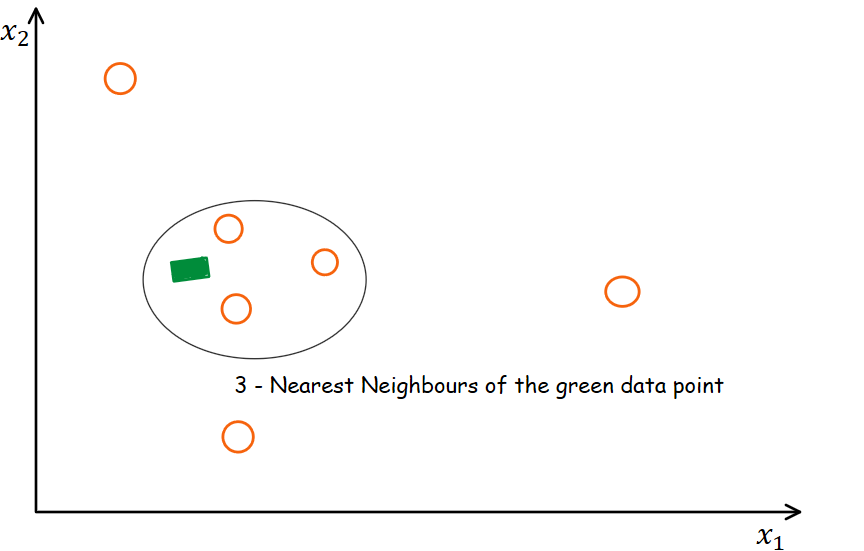

The idea in kNN methods is to identify ‘k’ samples in the dataset that are similar or close in the space. Then we use these ‘k’ samples to estimate the value of the missing data points. Each sample’s missing values are imputed using the mean value of the ‘k’-neighbors found in the dataset.

### Distance calculation in the presence of missing values

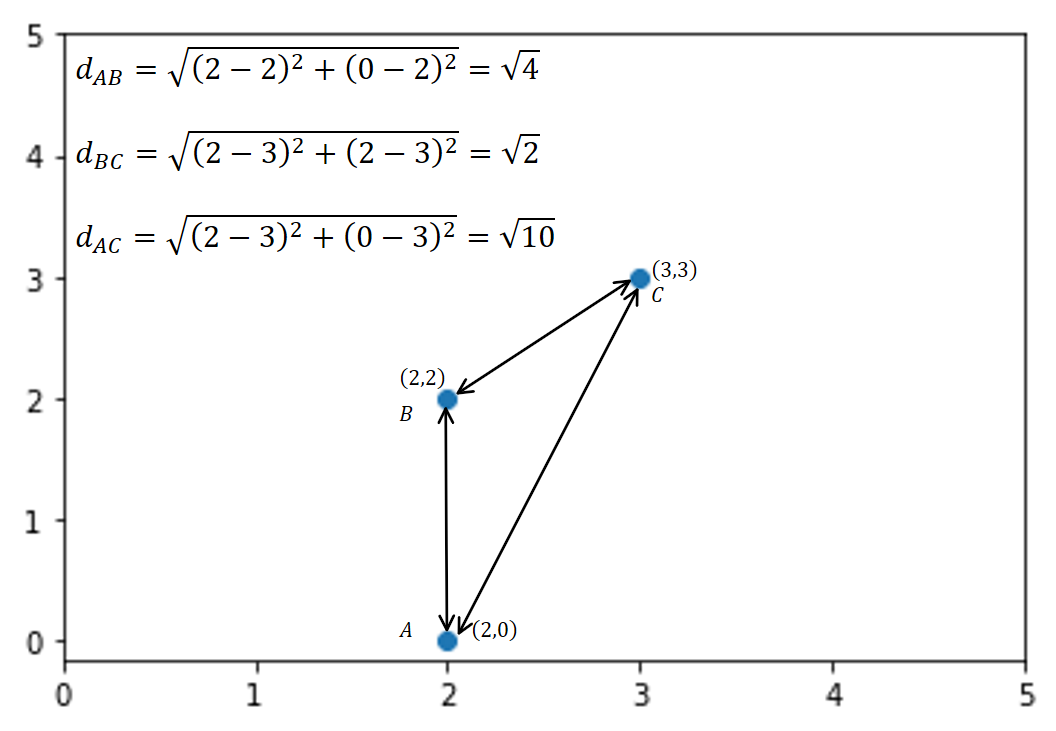

In the presence of missing coordinates, the Euclidean distance is calculated by ignoring the missing values and scaling up the weight of the non-missing coordinates.

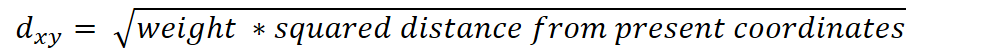

where,

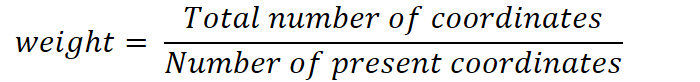

For example, the Euclidean distances between two points (3, NA, 5) and (1, 0, 0) is:

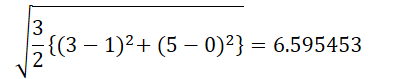

In [3]:
import numpy as np
from sklearn.metrics.pairwise import nan_euclidean_distances

X = [[3, np.nan, 5]]
Y = [[1, 0, 0]]

nan_euclidean_distances(X, Y)

array([[6.59545298]])

Even though nan_euclidean_distances works on two 1-dimensional arrays supplied by X and Y arguments but it can also work on a single array having multiple dimensions.

In [4]:
X = [[3, np.nan, 5], [1, 0, 0]]

nan_euclidean_distances(X, X)

array([[0.        , 6.59545298],
       [6.59545298, 0.        ]])

### Imputation Approach with KNNImputer

We will use the KNNImputer function from the impute module of the sklearn. KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.

In [5]:
X = [[3, np.nan, 5], [1, 0, 0], [3, 3, 3]]

nan_euclidean_distances(X, X)

array([[0.        , 6.59545298, 2.44948974],
       [6.59545298, 0.        , 4.69041576],
       [2.44948974, 4.69041576, 0.        ]])

In this case, the code above shows that observation 1 (3, NA, 5) and observation 3 (3, 3, 3) are closest in terms of distances (~2.45). Therefore, imputing the missing value in observation 1 (3, NA, 5) with a 1-nearest neighbor will give an estimate of 3 which is the same as that of the second dimension of observation 3 (3, 3, 3).

Further, imputing the missing value in observation 1 (3, NA, 5) with a 2-nearest neighbor will give an estimate of 1.5 which is the same as the mean value of the second dimension of observations 2 and 3, i.e. (1, 0, 0) and (3, 3, 3), respectively.

In [6]:
from sklearn.impute import KNNImputer

X = [[3, np.nan, 5], [1, 0, 0], [3, 3, 3]]

imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[3., 3., 5.],
       [1., 0., 0.],
       [3., 3., 3.]])

In [7]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[3. , 1.5, 5. ],
       [1. , 0. , 0. ],
       [3. , 3. , 3. ]])

Till now, we discussed missing value treatment using kNNImputer for continuous variables. Below, we create a data frame with missing values in categorical variables. For imputing missing values in categorical variables, we have to encode the categorical values into numeric values as kNNImputer works only for numeric variables. We can perform this using a mapping of categories to numeric variables.

In [14]:
import pandas as pd

# initialize a list
data = [['tom', 10, 'male'], ['nicky', 15, 'female'], ['juli', 14, None], 
         ['feni', 12, 'female'], ['johnny', 9, 'male']]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age', 'Gender'])

# print dataframe
df

,Name,Age,Gender
0,tom,10,male
1,nicky,15,female
2,juli,14,None
3,feni,12,female
4,johnny,9,male


In [15]:
# map the Gener value to 0 and 1
df['Gendermap'] = df.Gender.map({'female':1, 'male':0})

# print data frame
df[['Age', 'Gendermap']]

,Age,Gendermap
0,10,0.0
1,15,1.0
2,14,NaN
3,12,1.0
4,9,0.0


In [17]:
from sklearn.impute import KNNImputer

# knn base imputation for categorical variables
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df[['Age', 'Gendermap']])

# print the completed dataframe
df_filled

array([[10.,  0.],
       [15.,  1.],
       [14.,  1.],
       [12.,  1.],
       [ 9.,  0.]])